In [1]:
import os
import os.path as osp
import sys
import numpy as np

# add matplotlib before cv2, otherwise bug
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

sys.path.insert(0, '../tools')
import _init_paths
from roi_data_layer.layer import RoIDataLayer
from datasets.factory import get_imdb
from model.train_val import get_training_roidb

In [2]:
# visualize
def vis(imdb, blobs):
    PIXEL_MEANS = np.array([[[102.9801, 115.9465, 122.7717]]])
    im_data = blobs['data'][0].copy()
    im_data += PIXEL_MEANS
    im_data[:,:,:] = im_data[:,:,[2,1,0]]
    im_data = im_data.astype(np.uint8)
    plt.imshow(im_data)
    ax = plt.gca()
    num_objs = blobs['gt_masks'].shape[0]
    for ix in range(num_objs):
        # add mask
        m = blobs['gt_masks'][ix]  # uint8
        color_mask = np.random.random((1,3)).tolist()[0]
        img = np.ones( (m.shape[0], m.shape[1], 3) )
        for i in range(3):
            img[:, :, i] = color_mask[i]
        ax.imshow(np.dstack( (img, m*0.5) ))
        # add box and label
        box = blobs['gt_boxes'][ix] # uint8 (x1y1x2y2,cls)
        x1 = int(round(box[0]))
        y1 = int(round(box[1]))
        x2  = int(round(box[2]))
        y2  = int(round(box[3]))
        cls_ix = int(box[4])
        display_txt = imdb.classes[cls_ix]
        coords = (x1, y1), x2-x1+1, y2-y1+1
        ax.add_patch(plt.Rectangle(*coords, fill=False, edgecolor='red', linewidth=2))
        ax.text(x1, y1, display_txt, bbox={'facecolor':'red', 'alpha':0.5})

In [3]:
imdb = get_imdb('coco_2014_minival')
imdb.set_proposal_method('gt')
roidb = get_training_roidb(imdb)

loading annotations into memory...
Done (t=0.55s)
creating index...
index created!
Appending horizontally-flipped training examples...
coco_2014_minival gt roidb loaded from /playpen10/licheng/Documents/refer_cvpr2018/mask-faster-rcnn/data/cache/coco_2014_minival_gt_roidb.pkl
done
Preparing training data...
done


In [4]:
# Layer
data_layer = RoIDataLayer(roidb, imdb.num_classes)

['gt_boxes', 'data', 'im_info', 'gt_masks']
This image has 21 anns.


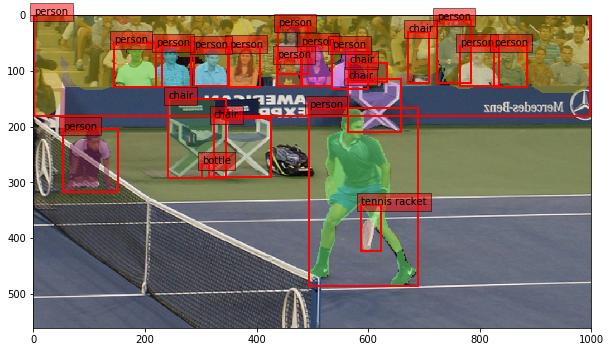

In [7]:
# get one batch
blobs = data_layer.forward()
print(blobs.keys())
print('This image has %s anns.' % blobs['gt_boxes'].shape[0])
vis(imdb, blobs)

In [8]:
blobs.keys()

['gt_boxes', 'data', 'im_info', 'gt_masks']